## Video Analisis

In [1]:
# Libraries for video analisis

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
video_path = "Video Useful\store-aisle-detection.mp4"

# video_path = "Video Useful\park_detection.avi"

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\AlexisBenitez\AppData\Local\Temp\ipykernel_20532\2690909016.py:1: SyntaxWarning: invalid escape sequence '\s'
  video_path = "Video Useful\store-aisle-detection.mp4"


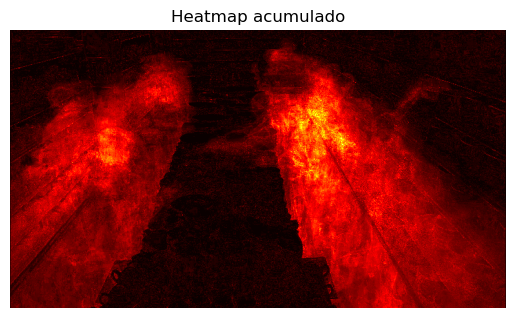

In [ ]:
#Opne video
cap = cv2.VideoCapture(video_path)

# Create background subtractor
bg_subtractor = cv2.createBackgroundSubtractorMOG2(
    history=500,        # Number of frames used to build the background.
    varThreshold=16,    # Sensitivity to detect changes
    detectShadows=True, # Shadow detection
)

heatmap_acumulado = None

while True:
    ret, frame = cap.read()
    if not ret:
        break

# Initialize accumulator if it is the first iteration -> They have the same dimensions (width and height)    
    if heatmap_acumulado is None:
        heatmap_acumulado = np.zeros_like(frame.shape[:2], dtype=np.float32)

    # Apply background subtraction -> Moving areas (objects) are highlighted
    fgmask = bg_subtractor.apply(frame)

    # Accumulate the mask (converted to float to avoid saturation)
    heatmap_acumulado = cv2.add(heatmap_acumulado, fgmask.astype(np.float32))

# Show the heat map
plt.imshow(heatmap_acumulado, cmap="hot")
plt.title("Accumulate Heatmap")
plt.axis("off")
plt.show()

### Nomalized Heatmap


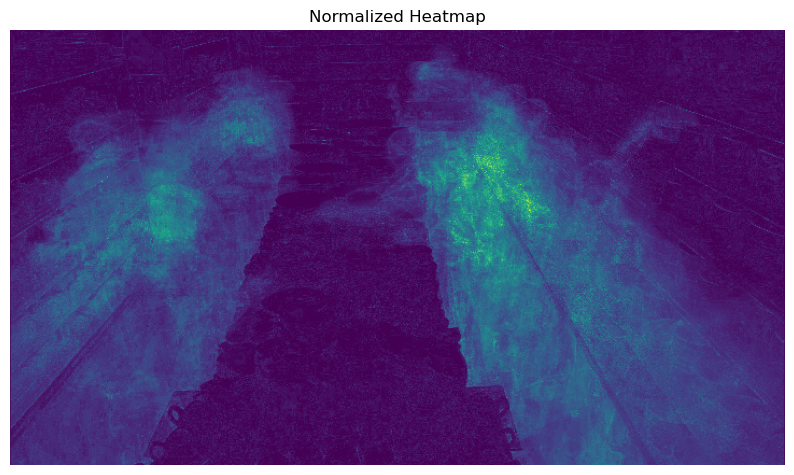

In [4]:
# Normalize the heatmap to range 0-255
heatmap_norm = cv2.normalize(heatmap_acumulado, None, 0, 255, cv2.NORM_MINMAX)
heatmap_norm = np.uint8(heatmap_norm)

# add a colormap (example, COLORMAP_VIRIDIS)
colored_heatmap = cv2.applyColorMap(heatmap_norm, cv2.COLORMAP_VIRIDIS)

# Visualization with matplotlib
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(colored_heatmap, cv2.COLOR_BGR2RGB))
plt.title("Normalized Heatmap")
plt.axis("off")
plt.show()